In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import linregress

In [4]:
df = pd.read_csv("task2.csv", sep=";")
df = df[df.index > 0]
df

,Name,VПАВ,Vвода,C,sigma,h,h1,h2,h3,h4,h6,h7,h8,h9,hA,hB,hC,hD
1,1,1.0,29.0,0.006667,68.070860,3632.083333,3637,3612,3654,3616,3627,3659,3612,3656,3629,3625,3643,3615
2,2,1.5,28.5,0.010000,66.132672,3528.666667,3532,3538,3537,3511,3509,3548,3537,3542,3522,3538,3510,3520
3,3,2.0,28.0,0.013333,63.802473,3404.333333,3405,3396,3402,3419,3378,3397,3412,3432,3397,3431,3400,3383
4,4,2.5,27.5,0.016667,61.430106,3277.750000,3270,3271,3276,3277,3269,3274,3270,3274,3276,3312,3294,3270
5,5,3.5,26.5,0.023333,58.573582,3125.333333,3119,3154,3152,3104,3102,3106,3104,3139,3147,3127,3108,3142
6,6,5.0,25.0,0.033333,54.533216,2909.750000,2907,2910,2905,2904,2924,2900,2916,2929,2904,2890,2905,2923
7,7,7.5,22.5,0.050000,49.230920,2626.833333,2631,2634,2628,2630,2633,2634,2624,2622,2605,2609,2629,2643
8,8,10.0,20.0,0.066667,44.451826,2371.833333,2384,2383,2393,2337,2359,2395,2406,2369,2360,2374,2343,2359
9,9,15.0,15.0,0.100000,38.442036,2051.166667,2064,2036,2084,2030,2069,2100,2055,2006,2024,2044,2045,2057
10,10,20.0,10.0,0.133333,34.560974,1844.083333,1844,1836,1850,1876,1831,1849,1832,1807,1803,1840,1829,1932


(-14.589271886782937,
 5.175333047657645,
 -0.9993560176529759,
 1.9615656380635667e-05,
 0.30243692027339886)

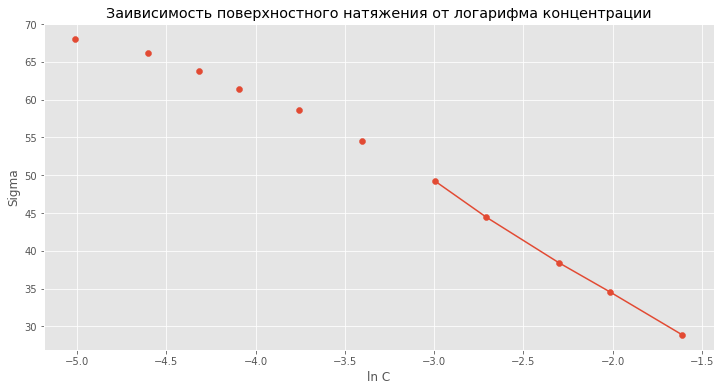

In [32]:
plt.figure(figsize=(12, 6))
plt.style.use("ggplot")
tmp = df[df.index < 12]
plt.scatter(np.log(tmp["C"]), tmp["sigma"])


tmp = df[(df.index < 12) & (df.index > 6)]
plt.plot(np.log(tmp["C"]), tmp["sigma"])
plt.title("Заивисимость поверхностного натяжения от логарифма концентрации")
plt.xlabel("ln C")
plt.ylabel("Sigma")
slope, intercept, r_value, p_value, std_err = linregress(np.log(tmp["C"]), tmp["sigma"])
slope, intercept, r_value, p_value, std_err

In [11]:
C1 = intercept
b = -slope
C1, b

(5.175333047657645, 14.589271886782937)

In [12]:
sigma0 = 72.75

In [13]:
A = np.exp((sigma0 - C1) / b)
A

102.69930063530747

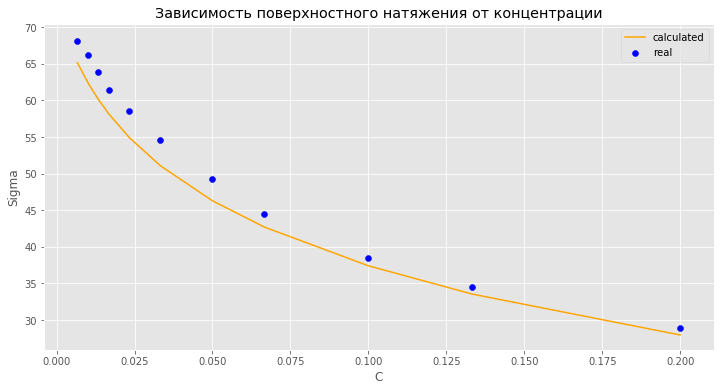

In [25]:
plt.figure(figsize=(12, 6))
df["sigmaR"] = sigma0 -b*np.log(1 + A * df["C"])
tmp = df[df.index < 12]
plt.plot(tmp["C"], tmp["sigmaR"], color="orange", label="calculated")
plt.scatter(tmp["C"], tmp["sigma"], color="blue", label="real")
plt.xlabel("C")
plt.ylabel("Sigma")
plt.title("Зависимость поверхностного натяжения от концентрации")
plt.legend()

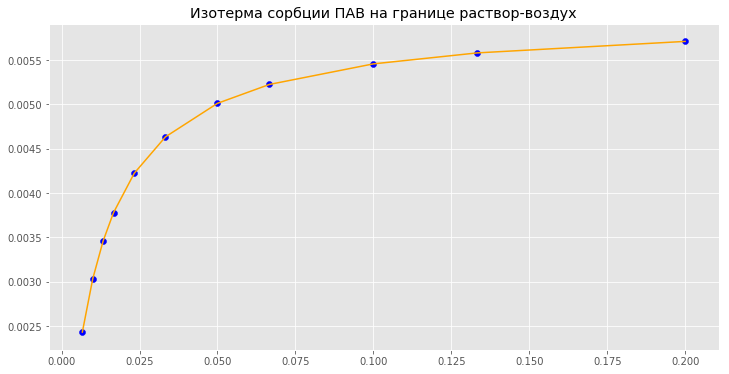

In [29]:
R = 8.314
T = 293.15
plt.figure(figsize=(12, 6))
df["Г"] = b / (R * T) * A * df["C"] / (1 + A * df["C"])
tmp = df[df.index < 12]
plt.title("Изотерма сорбции ПАВ на границе раствор-воздух")
plt.plot(tmp["C"], tmp["Г"], color="orange")
plt.scatter(tmp["C"], tmp["Г"], color="blue")


(167.05762418534482, 1.626667593176494, 1.0, 5.8534851285390365e-90, 0.0)

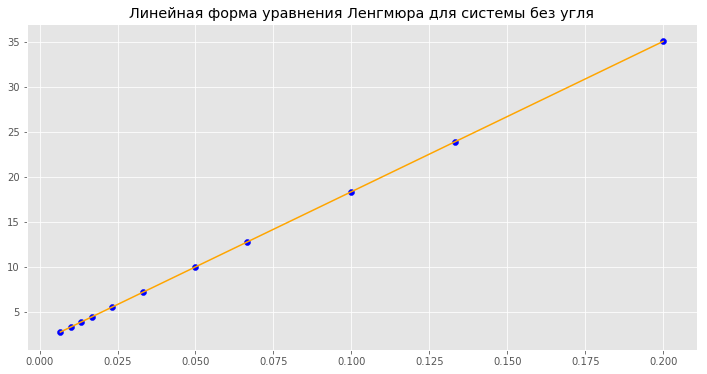

In [35]:
plt.figure(figsize=(12, 6))
plt.title("Линейная форма уравнения Ленгмюра для системы без угля")
tmp = df[df.index < 12]
plt.plot(tmp["C"], tmp["C"]/tmp["Г"], color="orange")
plt.scatter(tmp["C"], tmp["C"]/tmp["Г"], color="blue")
slope, intercept, r_value, p_value, std_err = linregress(tmp["C"], tmp["C"]/tmp["Г"])
slope, intercept, r_value, p_value, std_err

In [36]:
Гm = 1/slope
Гm

0.0059859584671845545

In [37]:
s0 = 1 / (Гm * 6.02e23)
s0

2.7750435911186844e-22

In [38]:
delta0 = Гm * (12*5+11+17) / 1000 / 814
delta0

6.471306451010328e-07

In [43]:
def sigma(C):
    return sigma0 -b*np.log(1 + A * C)

In [44]:
def C(sigma):
    return (np.exp((sigma0 - sigma)/b) - 1) / A

In [58]:
df["C*"] = C(df["sigma"])
df["Г*"] = (df["C"] - df["C*"]) * 30 / 1e6 / 1e-3

(286.3071608895604,
 16.196724716912136,
 0.9923799917434495,
 0.007620008256550514,
 25.13639659275105)

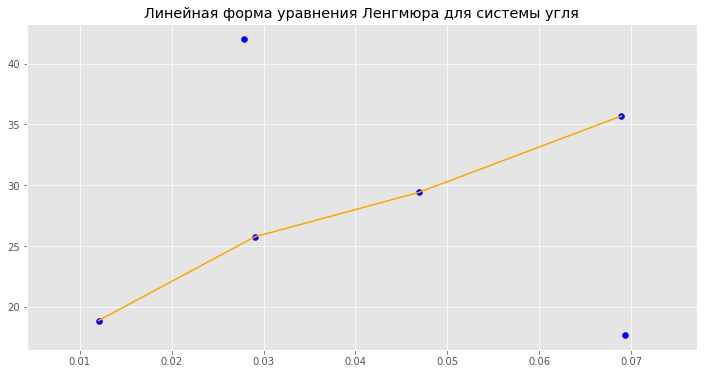

In [64]:
plt.figure(figsize=(12, 6))
plt.title("Линейная форма уравнения Ленгмюра для системы угля")
tmp = df[df.index > 11]
plt.scatter(tmp["C*"], tmp["C*"]/tmp["Г*"], color="blue")
tmp = df.loc[[12, 14, 15, 16]]
plt.plot(tmp["C*"], tmp["C*"]/tmp["Г*"], color="orange")
slope, intercept, r_value, p_value, std_err = linregress(tmp["C*"], tmp["C*"]/tmp["Г*"])
slope, intercept, r_value, p_value, std_err

In [66]:
Гу = 1 / slope
Гу

0.0034927523184994248

In [68]:
Sуд = Гу * 6.02e23 * s0
Sуд

0.5834909041963686